In [1]:
import sys
 
sys.path.append('..')
from piece import piece
piece.start()

In [2]:
piece.reset()
piece.synth_player.start()
piece.synth_player.note() \
    .sine(piece.control_instruments.static_control(440), piece.control_instruments.sine_control(0, 1)) \
    .pan(piece.control_instruments.static_control(0)) \
    .play(0, 1)

piece.synth_player.note() \
    .sine(piece.control_instruments.static_control(220), piece.control_instruments.sine_control(0, 1)) \
    .pan(piece.control_instruments.static_control(0)) \
    .play(1, 1)
    


In [2]:
piece.reset()
piece.synth_player \
    .add_sound("wood_hit_1", "/Users/danielstahl/Documents/Projects/py-soundmining-tools/samples/Wood hit 1.flac", 0.201, 0.339) \
    .start()

In [5]:
piece.synth_player.note() \
    .sound_mono("wood_hit_1", 1, piece.control_instruments.static_control(1)) \
    .pan(piece.control_instruments.static_control(0)) \
    .play(0)

In [6]:
piece.stop()

In [ ]:
from math import pi

from ipycanvas import Canvas

canvas = Canvas(width=200, height=200)

canvas.fill_style = "red"
canvas.stroke_style = "blue"

canvas.fill_arc(60, 60, 50, 0, pi)
canvas.stroke_circle(60, 60, 40)

canvas

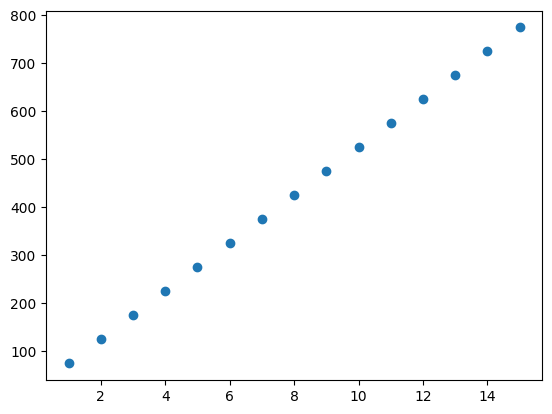

In [21]:
import matplotlib.pyplot as plt

from soundmining_tools import spectrum
from soundmining_tools import note
d2 = note.note_to_hertz("d2")
h2 = note.note_to_hertz("h2")
fact = spectrum.make_fact(d2, h2)
spect = spectrum.make_spectrum(d2, fact, 15)
fig, ax = plt.subplots()
x_values = list(range(1, 16))
ax.scatter(x_values, spect)
plt.show()


In [13]:
from soundmining_tools import spectrum
from soundmining_tools import note
from soundmining_tools.sieve import SimpleSieve

d2 = note.note_to_hertz("d2")
h2 = note.note_to_hertz("h2")
fact = spectrum.make_fact(d2, h2)
spect = spectrum.make_spectrum(d2, fact, 15)

sieve = SimpleSieve(2, 0)
amp_values = [1.0 / (i + 1.0) if sieve.is_sieve(i) else 0.0 for i in range(15)]
phases = [0.0 for i in range(15)]

piece.reset()
piece.synth_player.start()
piece.synth_player.note() \
    .bank_of_osc(spect, amp_values, phases) \
    .mono_volume(piece.control_instruments.sine_control(0, 1)) \
    .pan(piece.control_instruments.static_control(0)) \
    .play(0, 2)

    